# Домашнее задание №2 по линейной алгебре #

*Выполнила Кулик Екатерина*

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Задание 1 ##

In [2]:
df = pd.read_csv('brokering.txt', sep ="\t")
df

,dv,cs_connect,pol_connect,partmovmemb,gender,univ_educ,years_govreg,front_bure,region_code
0,1.0,0,0,0,0,1,31,0,1
1,2.2,0,0,0,1,0,37,0,1
2,1.0,0,0,0,0,1,17,1,1
3,1.2,0,0,0,1,1,6,0,1
4,1.0,0,0,0,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...
918,1.2,0,0,0,1,1,5,0,1501
919,1.2,0,0,0,1,0,6,1,1501
920,1.4,0,0,1,1,1,1,1,1501
921,1.0,0,0,0,1,1,3,1,1501


**МНК-оценки коэффициентов на стандартизированных данных**

In [3]:
X_without = df[[ 'cs_connect', 'pol_connect', 'partmovmemb', 'gender', 'univ_educ', 'years_govreg', 'front_bure']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without)

X = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
X

array([[ 1.        , -0.63125656, -0.33673376, ...,  0.48198521,
         1.40757754, -0.52091253],
       [ 1.        , -0.63125656, -0.33673376, ..., -2.07475244,
         1.89093864, -0.52091253],
       [ 1.        , -0.63125656, -0.33673376, ...,  0.48198521,
         0.27973498,  1.9197081 ],
       ...,
       [ 1.        , -0.63125656, -0.33673376, ...,  0.48198521,
        -1.00922795,  1.9197081 ],
       [ 1.        , -0.63125656, -0.33673376, ...,  0.48198521,
        -0.84810758,  1.9197081 ],
       [ 1.        , -0.63125656, -0.33673376, ...,  0.48198521,
        -0.12306593,  1.9197081 ]])

In [4]:
y = df[['dv']].values
y

array([[1. ],
       [2.2],
       [1. ],
       [1.2],
       [1. ],
       [1. ],
       [1.2],
       [1. ],
       [2.2],
       [1. ],
       [1. ],
       [1. ],
       [1.2],
       [1. ],
       [1.2],
       [1. ],
       [1. ],
       [1. ],
       [1.6],
       [2.2],
       [1. ],
       [3. ],
       [1. ],
       [1. ],
       [1. ],
       [5.8],
       [1.4],
       [1.6],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1.2],
       [1. ],
       [3.4],
       [1. ],
       [1. ],
       [1.4],
       [1. ],
       [1.2],
       [1. ],
       [1.4],
       [2.8],
       [2.2],
       [1.6],
       [1. ],
       [1. ],
       [1. ],
       [2.2],
       [1. ],
       [4.2],
       [1. ],
       [5.2],
       [1.4],
       [3.2],
       [1. ],
       [4.6],
       [2. ],
       [1. ],
       [3. ],
       [2. ],
       [2.4],
       [3.2],
       [3.8],
       [1. ],
       [4.6],
       [4.2],
       [1.4],
       [2. ],
       [3. ],
       [4.6],
      

In [5]:
b = np.dot(np.linalg.inv(np.dot(X.transpose(), X)).dot(X.transpose()), y)
b

array([[ 2.19154930e+00],
       [ 1.53545355e-01],
       [ 9.61379147e-02],
       [ 4.26169884e-01],
       [-6.78270974e-04],
       [-1.95128333e-02],
       [-3.50533707e-01],
       [-7.47575000e-02]])

**МНК-оценки коэффициентов на исходных данных**

In [6]:
X_without_2 = df[[ 'cs_connect', 'pol_connect', 'partmovmemb', 'gender', 'univ_educ', 'years_govreg', 'front_bure']].values
X_2 = np.hstack((np.ones((X_without_2.shape[0], 1)), X_without_2))
X_2

array([[ 1.,  0.,  0., ...,  1., 31.,  0.],
       [ 1.,  0.,  0., ...,  0., 37.,  0.],
       [ 1.,  0.,  0., ...,  1., 17.,  1.],
       ...,
       [ 1.,  0.,  0., ...,  1.,  1.,  1.],
       [ 1.,  0.,  0., ...,  1.,  3.,  1.],
       [ 1.,  0.,  0., ...,  1., 12.,  1.]])

In [7]:
b_2 = np.dot(np.linalg.inv(np.dot(X_2.transpose(), X_2)).dot(X_2.transpose()), y)
b_2

array([[ 2.27765086e+00],
       [ 3.40164150e-01],
       [ 3.17874146e-01],
       [ 9.82429605e-01],
       [-1.41332536e-03],
       [-4.98891956e-02],
       [-2.82390595e-02],
       [-1.82454697e-01]])

**ВЫВОД:**

Значения МНК-оценок коэффициентов линейной регрессии на стандартизированных и исходных данных сильно отличаются друг от друга, хотя и имеют схожий паттерн поведения (наблюдается схожая положительности и отрицательность коэффициентов). При масштабировании признаков оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но если оставлять данные нестадартизованными, то интерпретация коэффициентов тоже будет невозможна, поскольку каждая переменная измеряется в разных шкалах и будет невозможно разумно проинтерпретировать значения коэффициентов

**Градиент RSS**

In [8]:
y = y.reshape(y.shape[0])
b = b.reshape(b.shape[0])

In [9]:
rss = -2 * np.dot(X.transpose(), (y - np.dot(X, b)))
rss

array([-2.40163445e-12,  8.24229573e-13,  7.38964445e-13,  8.31335001e-13,
        6.96331881e-13,  3.41060513e-13, -4.19220214e-13, -4.79616347e-13])

**Градиентный спуск**

In [10]:
X.shape

(923, 8)

In [17]:
def grad_descend(X = X, Y = y, step_size = 10e-6, num_steps = 10000):
    
    w = np.zeros(8)
    w_list = [w.copy()]
    
    
    for i in range(num_steps):
        w -= 2 * step_size * np.dot(X.T, np.dot(X, w) - Y) / Y.shape[0]
        w_list.append(w.copy())
    w_list=np.array(w_list)
        
        
    return w_list

In [18]:
trace = grad_descend()
print(trace)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.38309859e-05  6.13603150e-06  4.81417270e-06 ...  2.01268036e-06
  -8.92303877e-06 -2.32349259e-06]
 [ 8.76610952e-05  1.22718422e-05  9.62815745e-06 ...  4.02524810e-06
  -1.78458351e-05 -4.64689687e-06]
 ...
 [ 3.97192305e-01  5.14772260e-02  3.97709429e-02 ...  1.51912652e-02
  -7.81755937e-02 -1.93353867e-02]
 [ 3.97228193e-01  5.14814946e-02  3.97741791e-02 ...  1.51923549e-02
  -7.81824088e-02 -1.93369782e-02]
 [ 3.97264079e-01  5.14857630e-02  3.97774151e-02 ...  1.51934445e-02
  -7.81892237e-02 -1.93385697e-02]]


**Вывод:** Как можно заметить, МНК-оценки и оценки, найденные градиентным спуском, сильно различаются. В то время как МНК определяет задачу оптимизации как нахождение значений параметров модели, которые максимизируют функцию правдоподобия в пространстве параметров, выбирая значения параметров, которые делают наблюдаемые данные наиболее вероятными, градиентный спуск оценивает значения параметров для модели путем итеративного поиска минимума функции потерь. В итоге последнее значение в векторе оценок по градиентному спуску будут значения близкие к нулю.

**Графики**

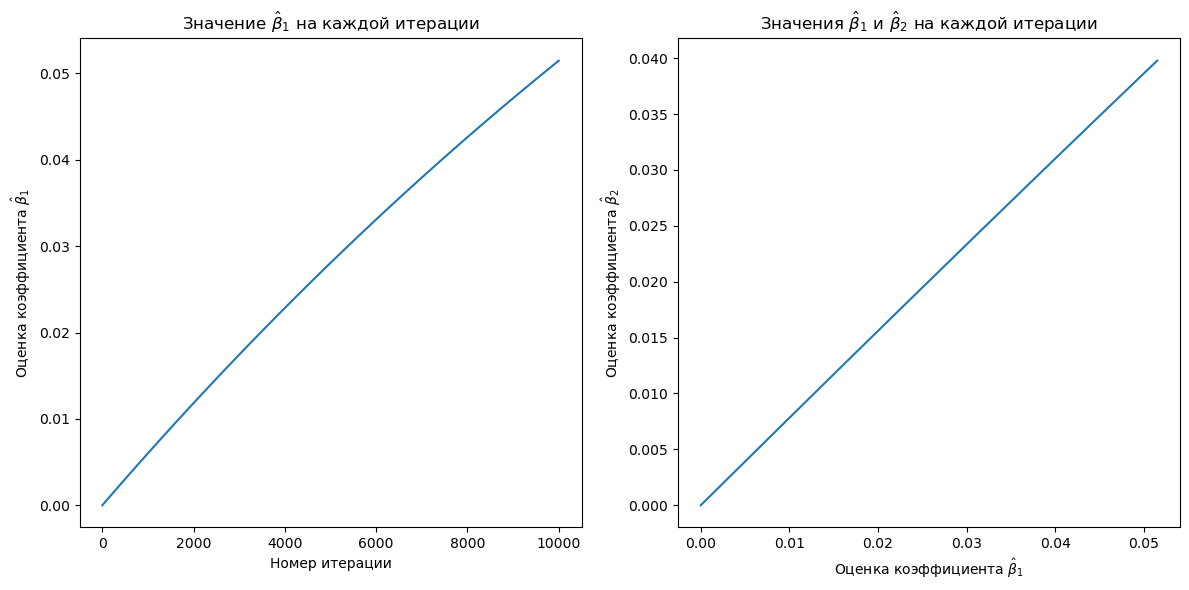

In [20]:
plt.figure(figsize=(12, 6))

# График 1
plt.subplot(1, 2, 1)
plt.plot(trace[:,1])
plt.xlabel('Номер итерации')
plt.ylabel('Оценка коэффициента $\\hat{\\beta}_1$')
plt.title('Значение $\\hat{\\beta}_1$ на каждой итерации')

# График 2
plt.subplot(1, 2, 2)
plt.plot(trace[:,1], trace[:,2])
plt.xlabel('Оценка коэффициента $\\hat{\\beta}_1$')
plt.ylabel('Оценка коэффициента $\\hat{\\beta}_2$')
plt.title('Значения $\\hat{\\beta}_1$ и $\\hat{\\beta}_2$ на каждой итерации')

plt.tight_layout()
plt.show()

**Вывод:** Касательно графика номер один, можно заметить практически линейную зависимость между номером итерации и оценкой коэффициента b1, то есть при увелечении числа итераций увеличивается и коэффициент b1, где-то в середине, в промежутке между 4000 и 8000, график становится более выпуклым, оценка коэффициента увеличивается чуть более сильно. Если говорить о втором графике, оценки коэффициентов b1 и b2 совершенно линейно зависият друг от друга, прямо проморционально возрастая в зависимости от роста другой.

**Градиентный спуск с другим шагом**

In [22]:
trace_new = grad_descend(step_size = 0.1)
print(trace_new)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.43830986  0.06136032  0.04814173 ...  0.0201268  -0.08923039
  -0.02323493]
 [ 0.78895775  0.10063604  0.07748944 ...  0.02899123 -0.15422043
  -0.03763947]
 ...
 [ 2.1915493   0.15354535  0.09613791 ... -0.01951283 -0.35053371
  -0.0747575 ]
 [ 2.1915493   0.15354535  0.09613791 ... -0.01951283 -0.35053371
  -0.0747575 ]
 [ 2.1915493   0.15354535  0.09613791 ... -0.01951283 -0.35053371
  -0.0747575 ]]


**Вывод:** Если градиентный спуск с шагом 10e−6 практически занулил все коэффициенты, то градиентный спуск с шагом 0.1 нет. Однако мы можем заметить, что МНК-оценки b будут ближе к первому варианту, нежели ко второму. То есть чем меньше шаг мы выбираем, тем ближе к нулю будут наши оценки и тем более похожи на изначальный коэффициент

## Задание 2 ##

In [59]:
np.random.seed(0)

X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                     test_size=0.2,\
                                                     shuffle=True,
                                                     random_state=0,
                                                     stratify=y)

**Оценки гребневой регрессии на различных парамаетрах**

In [60]:
def ridge_regression(X, y, lambda_param):
    
    n, p = X.shape
    beta_ridge = np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_param * np.identity(p)).dot(X.T), y)
    
    return beta_ridge

In [61]:
lambda_values = np.arange(0.1, 500.1, 0.1)

In [63]:
ridges=[]
for lambda_param in lambda_values:
    beta_ridge = ridge_regression(X_train, y_train, lambda_param)
    ridges.append(beta_ridge)

**Наилучший гиперпараметр**

In [68]:
rss_values = []

for beta_ridge in ridges:
    y_pred = np.dot(X_test, beta_ridge)
    rss = np.sum((y_test - y_pred) ** 2)
    rss_values.append(rss)

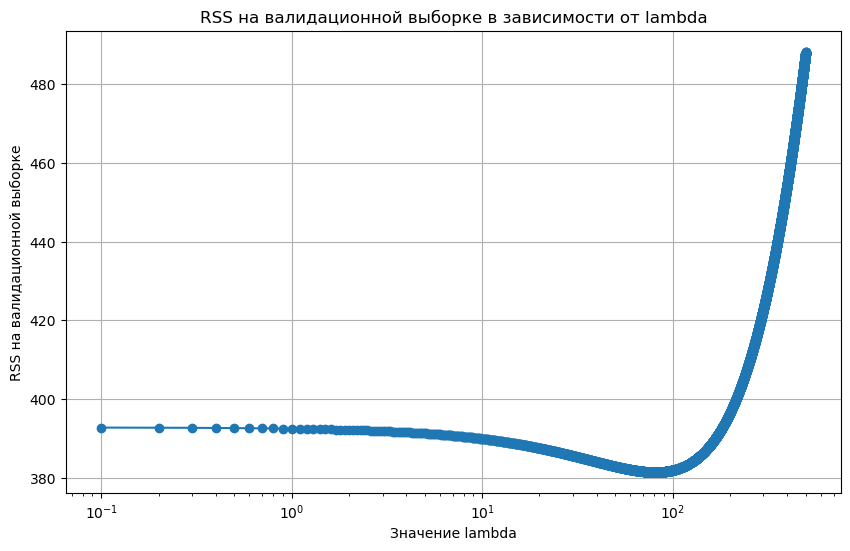

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, rss_values, marker='o', linestyle='-')
plt.xlabel('Значение lambda')
plt.ylabel('RSS на валидационной выборке')
plt.title('RSS на валидационной выборке в зависимости от lambda')
plt.xscale('log')  
plt.grid(True)
plt.show()

In [72]:
min_rss_index = np.argmin(rss_values)
min_rss = rss_values[min_rss_index]
corresponding_lambda = lambda_values[min_rss_index]

print("Минимальный RSS:", min_rss)
print("Соответсвующая lambda:", corresponding_lambda)

Минимальный RSS: 381.4916383811778
Соответсвующая lambda: 81.0


**МНК-оценки гребневой регрессии с наилучшим гиперпараметром**

In [73]:
corresponding_betas_ridge = ridges[min_rss_index]
print("Соответсвующие коэффициенты ridge-регрессии:", corresponding_betas_ridge)

Соответсвующие коэффициенты ridge-регрессии: [ 2.01204915e+00  1.60762071e-01  9.33568557e-02  4.22880290e-01
  6.56240418e-04 -2.65153652e-04 -2.99570182e-01 -4.67261867e-02]


**Вывод:** МНК-оценки на обычной регрессии и МНК-оценки на гребневой оценке примерно равны друг другу. Гребневая регрессия лишь слегка снизила коэффициенты оценок, что может говорить о низкой мультиколлениарности наших переменных и отсутсвия сильного разброса или смещения. Гребневая регрессия приблизила оценки коэффициентов чуть ближе к нулю, чтобы снизить их дисперсию и сделать оценки чуть более стабильными и устойчивами. Важно помнить, что гребневая регрессия не осуществляет жесткий отбор наиболее существенных переменных, она просто уменьшает вклад менее значимых переменных, сохраняя при этом все предикторы в модели.

**КОНЕЦ!**

P.S. Это было безумно сложно, поэтому в конце будет так называемый мэм

![alternatvie text](https://i.redd.it/4zvpy91uviab1.jpg)